Extract a small subset from the middle of the TSA 24 spatial stand inventory (for the purpose of building a prototype model).

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

/opt/jupyterhub/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


Load inventory data into memory as a GeoDataFrame.

In [2]:
gdf = gpd.read_file('data/shp/tsa24.shp/stands.shp')
gdf

,theme0,theme1,theme2,curve1,curve2,SPECIES_CD,age,area,theme3,geometry
0,tsa24,1,2401007,2401007,2401007,SX,155,6.8,100,"POLYGON ((1089487.210 1124966.350, 1089494.487..."
1,tsa24,1,2403000,2423000,2403000,SX,36,40.9,100,"POLYGON ((1123192.528 1094020.302, 1123183.729..."
2,tsa24,1,2403000,2423000,2403000,SX,44,17.6,100,"POLYGON ((1115968.140 1094682.004, 1115946.830..."
3,tsa24,0,2402001,2402001,2402001,BL,95,20.3,304,"POLYGON ((861311.897 1337705.266, 861317.774 1..."
4,tsa24,0,2403000,2403000,2403000,SX,146,6.5,100,"POLYGON ((992214.338 1146502.183, 992239.290 1..."
...,...,...,...,...,...,...,...,...,...,...
458703,tsa24,0,2403001,2403001,2403001,BL,143,8.1,304,"POLYGON ((969595.215 1267762.572, 969590.908 1..."
458704,tsa24,1,2401004,2401004,2401004,SE,207,8.6,104,"POLYGON ((1117201.111 967846.360, 1117226.363 ..."
458705,tsa24,0,2403001,2403001,2403001,BL,181,19.4,304,"POLYGON ((1006994.604 1208298.668, 1007013.180..."
458706,tsa24,1,2403001,2403001,2403001,BL,77,8.5,304,"POLYGON ((1105663.519 962962.601, 1105664.969 ..."


Extract the bounding box coordinates for the entire dataset.

In [3]:
bb = gdf.total_bounds
bb

array([ 834450.0001,  878258.9981, 1393593.6151, 1367370.0001])

Calculate the centre point.

In [4]:
cx, cy = bb[0] + (bb[2] - bb[0])/2, bb[1] + (bb[3] - bb[1])/2
cx, cy

(1114021.8076, 1122814.4990999997)

Define x and y buffer distances.

In [5]:
dx, dy = 2000, 2000

Define a clip box polygon

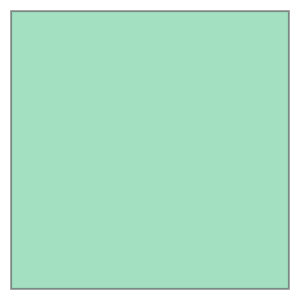

In [6]:
clip_box = Polygon([(cx - dx, cy - dy), (cx + dx, cy - dy), (cx + dx, cy + dy), (cx - dx, cy + dy), (cx - dx, cy - dy)])
clip_box

Clip invenory.

In [7]:
gdf_ = gdf.clip(clip_box)

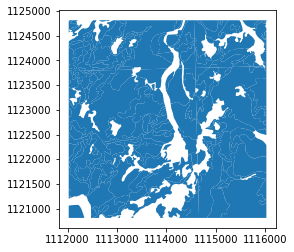

In [8]:
gdf_.plot()

In [9]:
gdf_['area'].sum()

2054.2000000000003

In [10]:
gdf_.area.sum() * 0.0001

1366.7377375751437

Some polygon areas wrong, because edge stands got clipped.

In [12]:
gdf_['area'] = gdf_.area * 0.0001
gdf_['area'].sum()

1366.7377375751437

Areas good now.

Set `theme0` values.

In [13]:
gdf_['theme0'] = 'tsa24_clipped'

Save clipped inventory to a new Shapefile.

In [14]:
!mkdir data/shp/tsa24_clipped.shp

mkdir: cannot create directory ‘data/shp/tsa24_clipped.shp’: File exists


In [15]:
gdf_.to_file('data/shp/tsa24_clipped.shp/stands.shp')

/opt/jupyterhub/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
